In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("./heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(918, 12)

In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# STEP 3: Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [9]:
print(categorical_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [12]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Sex
['M' 'F']

Column: ChestPainType
['ATA' 'NAP' 'ASY' 'TA']

Column: RestingECG
['Normal' 'ST' 'LVH']

Column: ExerciseAngina
['N' 'Y']

Column: ST_Slope
['Up' 'Flat' 'Down']


In [ ]:
# ChestPainType
#ATA - Atypical Angina - Chest pain not related to exertion; may not indicate heart disease.
#NAP - Non-Anginal Pain - Chest pain not related to the heart, typically gastrointestinal or musculoskeletal.
#ASY - Asymptomatic - No chest pain, but other signs (like abnormal ECG) may be present. Often found in high-risk patients.
#TA - Typical Angina - Classic exertional chest pain related to coronary artery disease (CAD). Predictable and reproducible.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ChestPainType_encoded'] = le.fit_transform(df['ChestPainType'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

In [ ]:
#RestingECG
#Normal - Normal ECG - Heart rhythm and conduction are within normal limits.
#ST - ST-T Wave Abnormality - Indicates possible myocardial ischemia (reduced blood flow to heart). Could suggest problems like angina or past heart attack.
#LVH - Left Ventricular Hypertrophy Thickening of the left ventricleâ€™s wall, often due to high blood pressure or heart disease. Can be a sign of long-term cardiac stress.

In [ ]:
#ExerciseAngina
#No - The patient did not experience angina during exercise.
#Yes - The patient did experience angina during exercise, which may suggest obstructed blood flow or coronary artery disease (CAD).

In [ ]:
#ST_Slope (Slope of the Peak Exercise ST Segment)
#Upsloping - Usually considered normal â€” heart is responding well to stress.
#Flat ST segment - Could indicate myocardial ischemia â€” a warning sign for coronary artery disease.
#Downsloping - More strongly associated with abnormal stress test results, especially in patients with angina or blocked arteries.

In [13]:
print(numerical_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [19]:
# STEP 5: Train-test split
X = df_encoded.drop(columns=["HeartDisease"])
y = df_encoded["HearDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [24]:
X.shape, y.shape,X_train.shape,y_train.shape, X_test.shape, y_test.shape

((10000, 23), (10000,), (8000, 23), (8000,), (2000, 23), (2000,))

In [26]:
X_train.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,...,Previous_Gestational_Diabetes,Sex_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Alcohol_Consumption_Moderate,Smoking_Status_Former,Smoking_Status_Never
7602,-0.115934,-1.599322,-0.736354,-1.431357,-0.764085,0.432051,-1.442000,0.942126,1.616116,-0.294834,...,-1.034080,True,False,False,True,False,False,True,False,False
7989,-1.368428,1.031853,1.422642,0.011562,-1.030798,0.432051,-0.353280,-1.379263,0.150808,0.223997,...,-1.034080,True,False,True,False,False,False,False,False,True
4741,-0.046351,-1.177035,-0.429916,-1.391571,-0.878391,0.025326,-0.020615,-0.098733,1.285756,-0.639431,...,-1.034080,True,False,False,True,False,False,True,True,False
3544,0.092815,-1.713015,-1.300479,-0.582581,-0.725983,-0.555710,-1.102356,0.305285,0.307996,-0.620071,...,-1.034080,True,True,False,False,True,False,True,False,False
2715,-1.646759,1.324206,1.499251,0.398816,1.522026,-0.788124,-0.909271,-1.481979,0.558430,0.553106,...,0.967043,True,True,False,False,True,False,False,True,False


In [28]:
X_test.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,...,Previous_Gestational_Diabetes,Sex_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Alcohol_Consumption_Moderate,Smoking_Status_Former,Smoking_Status_Never
5903,-0.603015,1.535350,1.610683,-1.566631,1.026702,-1.427263,-1.041872,-0.982093,-0.928191,-0.643302,...,-1.03408,True,True,False,False,True,False,True,True,False
1432,0.719062,0.983128,-0.200088,-1.590503,-0.002048,1.594122,-1.500158,1.222884,0.092196,-0.298706,...,-1.03408,True,False,False,False,True,False,True,True,False
7896,1.484475,0.560840,1.701222,-1.550717,-0.687881,1.361707,-0.371890,-0.317861,0.763573,0.092353,...,-1.03408,True,False,False,False,False,False,False,True,False
2486,0.719062,-0.056349,-1.509414,-0.553404,0.074156,0.025326,0.847104,-0.715031,1.357689,0.754444,...,-1.03408,False,False,True,False,False,False,True,True,False
7548,1.136560,-1.518113,1.610683,0.897473,0.264665,-1.020538,-1.721159,-0.057646,-0.608487,0.278203,...,-1.03408,True,False,False,False,True,False,False,False,True


In [23]:
# STEP 6: Scale numeric features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [40]:
# Check class distribution in the target
class_counts = y.value_counts()
class_ratio = y.value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Proportions:\n", class_ratio)

Class Counts:
 Diabetes
1    7784
0    2216
Name: count, dtype: int64

Class Proportions:
 Diabetes
1    0.7784
0    0.2216
Name: proportion, dtype: float64


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Initialize and train the model
model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
# Predict labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

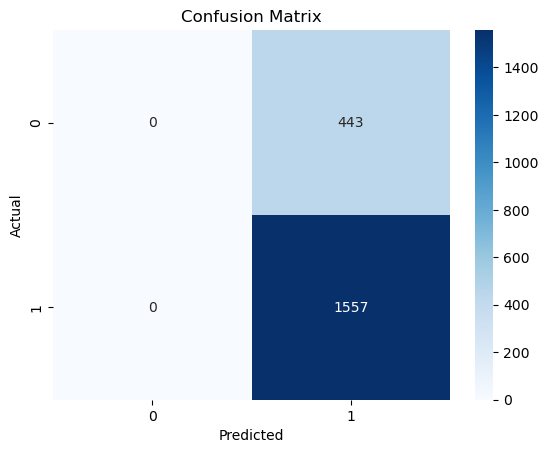

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       443
           1       0.78      1.00      0.88      1557

    accuracy                           0.78      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.61      0.78      0.68      2000

ROC-AUC Score: 0.496


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc_auc, 3))

In [44]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_sm))

After SMOTE: Counter({0: 6227, 1: 6227})


In [45]:
# Initialize and train the model
model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [46]:
# Predict labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

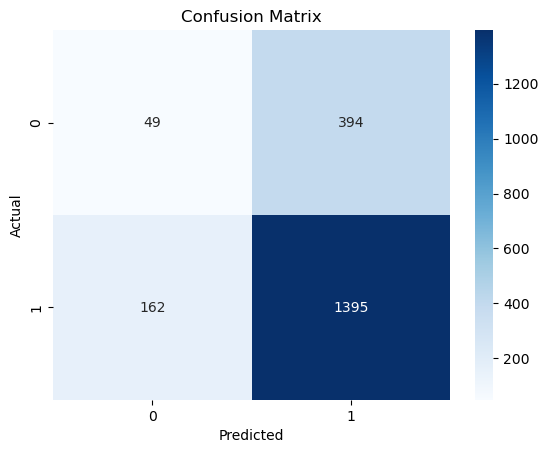

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.11      0.15       443
           1       0.78      0.90      0.83      1557

    accuracy                           0.72      2000
   macro avg       0.51      0.50      0.49      2000
weighted avg       0.66      0.72      0.68      2000

ROC-AUC Score: 0.466


In [47]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc_auc, 3))

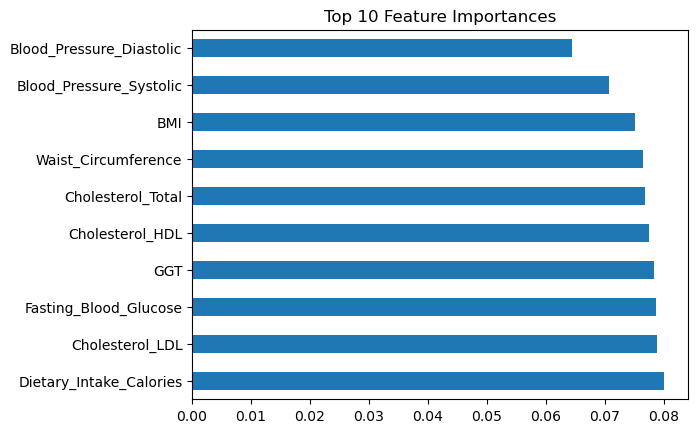

In [33]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [ ]:
#### XGBoost

In [35]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:22:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
# Predict labels and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

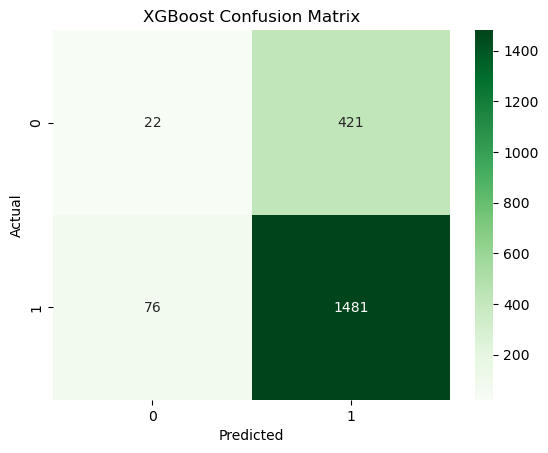

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.05      0.08       443
           1       0.78      0.95      0.86      1557

    accuracy                           0.75      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.66      0.75      0.68      2000

XGBoost ROC-AUC Score: 0.529


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost ROC-AUC Score:", round(roc_auc_xgb, 3))

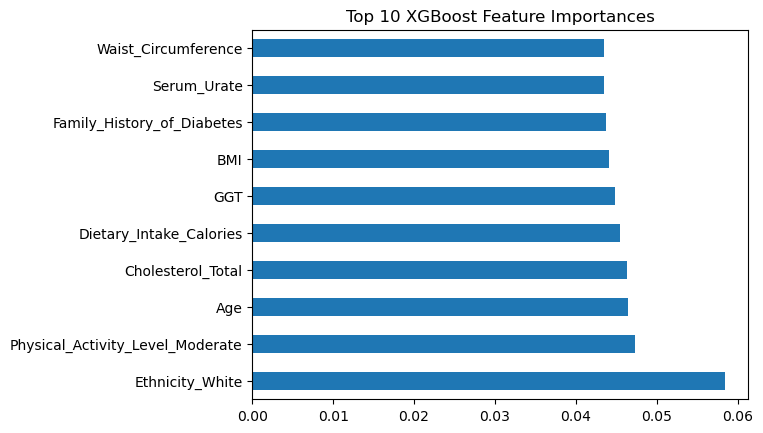

In [38]:
import pandas as pd

xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 XGBoost Feature Importances")
plt.show()

In [48]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=2216/7784, random_state=42)
xgb_model.fit(X_train, y_train)

#### scale_pos_weight = (negative / positive) — helps XGBoost focus more on the minority class

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
# Predict labels and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

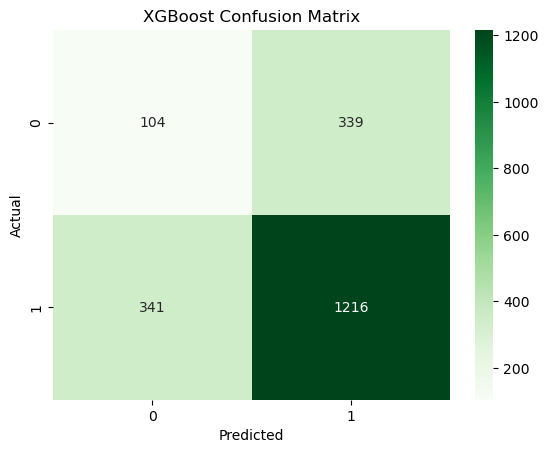

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.23      0.23       443
           1       0.78      0.78      0.78      1557

    accuracy                           0.66      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.66      0.66      0.66      2000

XGBoost ROC-AUC Score: 0.508


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost ROC-AUC Score:", round(roc_auc_xgb, 3))

In [39]:
# Check class distribution in the target
class_counts = y.value_counts()
class_ratio = y.value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Proportions:\n", class_ratio)

Class Counts:
 Diabetes
1    7784
0    2216
Name: count, dtype: int64

Class Proportions:
 Diabetes
1    0.7784
0    0.2216
Name: proportion, dtype: float64


In [51]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
xgb_model_sm = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_sm.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_sm = xgb_model_sm.predict(X_test)
y_prob_sm = xgb_model_sm.predict_proba(X_test)[:, 1]

# Classification report
print("SMOTE + XGBoost Classification Report:")
print(classification_report(y_test, y_pred_sm))

# ROC-AUC
roc_auc_sm = roc_auc_score(y_test, y_prob_sm)
print("SMOTE + XGBoost ROC-AUC Score:", round(roc_auc_sm, 3))

SMOTE + XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.14      0.17       443
           1       0.78      0.85      0.81      1557

    accuracy                           0.70      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.65      0.70      0.67      2000

SMOTE + XGBoost ROC-AUC Score: 0.484


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [52]:
scale_pos_weight = count_negative / count_positive
                 = 2216 / 7784 ≈ 0.285

IndentationError: unexpected indent (2692067565.py, line 2)

In [53]:
xgb_model_wt = XGBClassifier(
    scale_pos_weight=0.285, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model_wt.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
# Predict and evaluate
y_pred_sm = xgb_model_wt.predict(X_test)
y_prob_sm = xgb_model_wt.predict_proba(X_test)[:, 1]

# Classification report
print("SMOTE + XGBoost Classification Report:")
print(classification_report(y_test, y_pred_sm))

# ROC-AUC
roc_auc_sm = roc_auc_score(y_test, y_prob_sm)
print("SMOTE + XGBoost ROC-AUC Score:", round(roc_auc_sm, 3))

SMOTE + XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.22      0.22       443
           1       0.78      0.79      0.78      1557

    accuracy                           0.66      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.66      0.66      0.66      2000

SMOTE + XGBoost ROC-AUC Score: 0.513


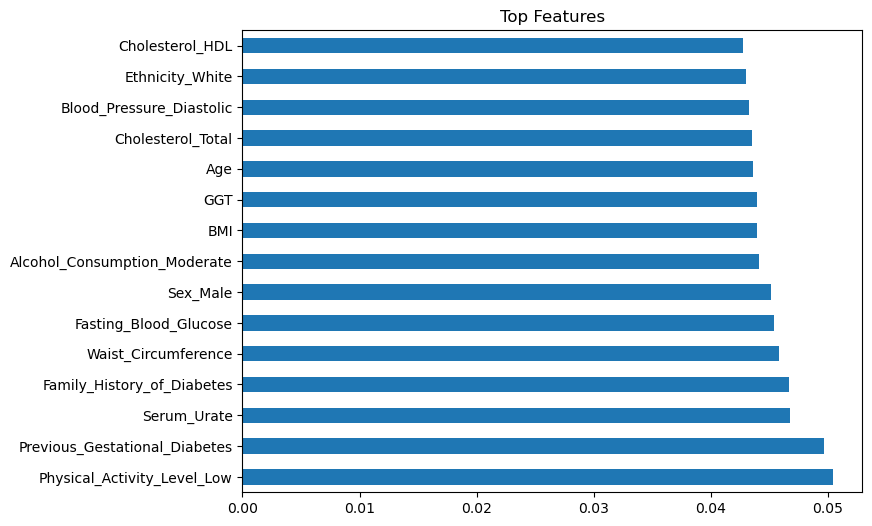

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance plot
importances = pd.Series(xgb_model_wt.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8,6), title='Top Features')
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("LogReg ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       0.20      0.42      0.27       443
           1       0.76      0.53      0.63      1557

    accuracy                           0.51      2000
   macro avg       0.48      0.48      0.45      2000
weighted avg       0.64      0.51      0.55      2000

LogReg ROC-AUC: 0.4741029733918472


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [0.25, 0.5, 1, 2]
}

# Base XGBoost model
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model evaluation
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Print results
print("Best XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("Best XGBoost ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:48:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:48:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:48:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:48:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.80      0.35       443
           1       0.78      0.20      0.32      1557

    accuracy                           0.34      2000
   macro avg       0.50      0.50      0.34      2000
weighted avg       0.66      0.34      0.33      2000

Best XGBoost ROC-AUC: 0.492
